In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.init as init

import torchvision.datasets as dset
import torchvision.transforms as transforms

from torch.utils.data import DataLoader

import matplotlib.pyplot as plt

In [2]:
CF_train=dset.CIFAR10('./data', train=True, transform=transforms.ToTensor(), target_transform=None, download=False)
CF_test=dset.CIFAR10('./data', train=False, transform=transforms.ToTensor(), target_transform=None, download=False)

In [3]:
batch_size=256
learning_rate=0.002
num_epoch=10

In [4]:
train_loader=torch.utils.data.DataLoader(CF_train, batch_size=batch_size, shuffle=True, num_workers=2, drop_last=True)
test_loader=torch.utils.data.DataLoader(CF_test, batch_size=batch_size, shuffle=False, num_workers=2, drop_last=True)

In [5]:
class CNN(nn.Module):
  def __init__(self):
    super(CNN,self).__init__()
    self.layer=nn.Sequential(nn.Conv2d(3,16,5), nn.ReLU(),nn.Conv2d(16,32,5),nn.ReLU(),
    nn.MaxPool2d(2,2), nn.Conv2d(32,64,5), nn.ReLU(), nn.MaxPool2d(2,2))
    self.fc_layer=nn.Sequential(nn.Linear(1024,100),nn.ReLU(),nn.Linear(100, 10))
  def forward(self, x):
    out=self.layer(x)
    out=out.view(batch_size, -1)
    out=self.fc_layer(out)
    return out

In [6]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu") 
print(device)

cpu


In [7]:
model=CNN().to(device)
loss_func=nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(model.parameters(), lr=learning_rate)

In [8]:
loss_arr=[]
for i in range(num_epoch):
  for j,[image,label] in enumerate(train_loader):
    x=image.to(device)
    y_=label.to(device)

    optimizer.zero_grad()
    output=model.forward(x)
    loss=loss_func(output, y_)
    loss.backward()
    optimizer.step()

    if j%1000==0:
      print(loss)
      loss_arr.append(loss.cpu().detach().numpy())

tensor(2.3001, grad_fn=<NllLossBackward>)
tensor(1.6023, grad_fn=<NllLossBackward>)
tensor(1.3010, grad_fn=<NllLossBackward>)
tensor(1.2093, grad_fn=<NllLossBackward>)
tensor(1.0976, grad_fn=<NllLossBackward>)
tensor(1.0341, grad_fn=<NllLossBackward>)
tensor(0.9234, grad_fn=<NllLossBackward>)
tensor(0.8035, grad_fn=<NllLossBackward>)
tensor(0.7775, grad_fn=<NllLossBackward>)
tensor(0.7855, grad_fn=<NllLossBackward>)


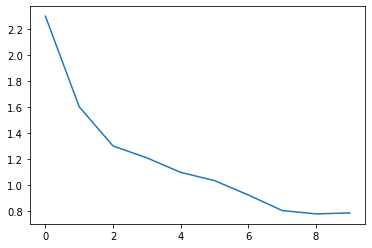

In [9]:
import matplotlib.pyplot as plt
plt.plot(loss_arr)
plt.show()

In [10]:
correct = 0
total = 0

with torch.no_grad():
    for image,label in test_loader:
        x = image.to(device)
        y_= label.to(device)
        output = model.forward(x)
        _,output_index = torch.max(output,1)
        total += label.size(0)
        correct += (output_index == y_).sum().float()
    print("Accuracy of Test Data: {}%".format(100*correct/total))

Accuracy of Test Data: 68.60977935791016%
